In [14]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fname=fm.FontProperties(fname='malgun.ttf').get_name()
mpl.rc('font',family=fname)
import matplotlib.gridspec as gridspec

In [15]:
dbname='hyundaiStock.db'
def selData(whr='where SIDX=0'):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select SDAY, OPENP, HIGHP,LOWP, CLOSEP, VOL from StockDay '+whr
        cur.execute(sql)
        rows=cur.fetchall()
        cur.close()
    return rows

In [16]:
whr='where SDAY>20200101 and SCODE="035760" order by SDAY asc limit 250'
res = selData(whr)
cols=['SDAY', 'OPENP', 'HIGHP','LOWP', 'CLOSEP', 'VOL']
df=pd.DataFrame(data=res, columns=cols)
df.head()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL
0,20200102,159300,159400,151000,155600,125376
1,20200103,155800,157500,153100,154700,98855
2,20200106,153000,153900,150200,150200,78272
3,20200107,150300,154600,150300,154600,65431
4,20200108,152700,153200,150700,151300,75841


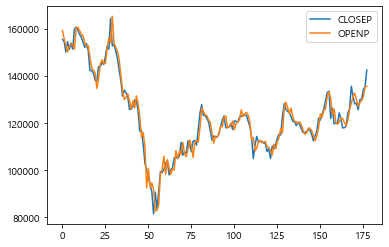

In [17]:
sels=['CLOSEP','OPENP']
df[sels].plot()
#plt.xlim(50,75)
#plt.ylim(50000,70000)
plt.show()

### 이동평균선
* 주가 기술분석
* 단가 이평선(5일 이평선), 장기 이평선(30일 이평선)을 설정
* 장단기 이평선을 분석
* 골든크로스 (단기 이평선이 장기 이평선아래서 위로 통과하는 지점)
* 데드크로스 (단기 이평선이 장기 이평선 위에서 아래로 통과하는 지점)
* 마케팅의 시장평가 지점을 지정(마케팅 잘못하여 저평가 된 지점-> 이평선으로 볼 수 있다.)

In [18]:
def makeMV(baseday=5, basedata=df['CLOSEP']):#5일 평균선
    res=[]   
    # 초기화 하기
    for i in range(baseday-1):
        res.append(0)
    # 이동 평균 데이터 만들기
    n=len(basedata)-baseday+1 #174개
    print("총 데이터수:", len(basedata), "초기화 안되고 채워야 할 부분:",n)
    for i in range(n):
        mvdata= np.average(basedata[i:i+baseday])
        res.append(mvdata)
    return res

In [19]:
df['MV5']= makeMV(5)
df['MV30']= makeMV(30)
df['MV10']=makeMV(10)
df.head()

총 데이터수: 178 초기화 안되고 채워야 할 부분: 174
총 데이터수: 178 초기화 안되고 채워야 할 부분: 149
총 데이터수: 178 초기화 안되고 채워야 할 부분: 169


,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL,MV5,MV30,MV10
0,20200102,159300,159400,151000,155600,125376,0.0,0.0,0.0
1,20200103,155800,157500,153100,154700,98855,0.0,0.0,0.0
2,20200106,153000,153900,150200,150200,78272,0.0,0.0,0.0
3,20200107,150300,154600,150300,154600,65431,0.0,0.0,0.0
4,20200108,152700,153200,150700,151300,75841,153280.0,0.0,0.0


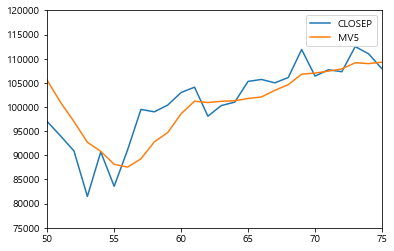

In [20]:
# 5일 평균 그래프
df[['CLOSEP', 'MV5']].plot()
plt.xlim(50,75)
plt.ylim(75000,120000)
plt.legend()
plt.show()

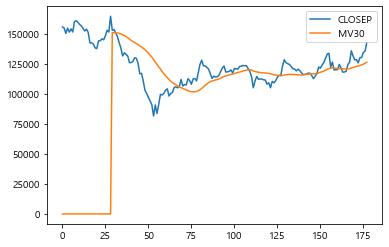

In [21]:
# 30일 평균 그래프
df[['CLOSEP', 'MV30']].plot()
#plt.xlim(50,100)
#plt.ylim(75000,120000)
plt.legend()
plt.show()

### 장단기 크로스 포인트 분석
* 주가 장단기 이평선에 관한 크로스 포인트 분석
* 이를 통해 시장에 반영된 마케팅 기준선을 부여

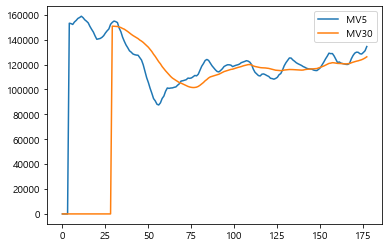

In [22]:
# 5, 30일 평균 그래프 겹치는 지점에 무슨일이 있었는지....
# 마케팅이 어디서 잘못되었는지, 
df[['MV5', 'MV30']].plot()
#plt.xlim(50,100)
#plt.ylim(75000,120000)
plt.legend()
plt.show()

In [23]:
short=df['MV5']
long=df['MV30']
res=[]
longday=30
for i in range(longday):
    res.append(0)
    
for i in range(longday, len(short)):
    if (short[i]>long[i]):
        res.append(1)
    else:
        res.append(-1)
df['holdPos']= res
df.head()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL,MV5,MV30,MV10,holdPos
0,20200102,159300,159400,151000,155600,125376,0.0,0.0,0.0,0
1,20200103,155800,157500,153100,154700,98855,0.0,0.0,0.0,0
2,20200106,153000,153900,150200,150200,78272,0.0,0.0,0.0,0
3,20200107,150300,154600,150300,154600,65431,0.0,0.0,0.0,0
4,20200108,152700,153200,150700,151300,75841,153280.0,0.0,0.0,0


C:\Data\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Data\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


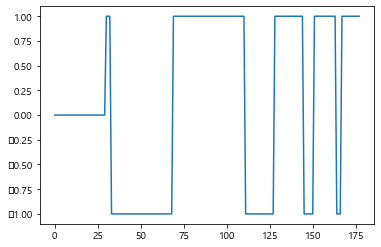

In [24]:
plt.plot(res)

### 성장 동력과 크로스포인트와의 관계
* 단기 성장성(성장비율)과 장단기 주가 모멘텀 분석
* 실질적 주가에 영향을 주는 마케팅 포인트 지점 획득 (목적)

C:\Data\envs\py37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Data\envs\py37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Data\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Data\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


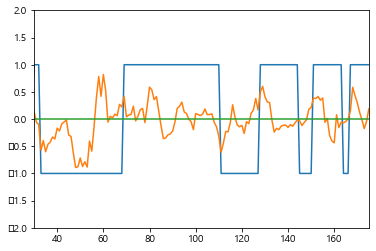

In [25]:
baseData=df['MV5']
res=[1]
for i in range(1, len(baseData)):
    c=((baseData[i]/baseData[i-1])-1)*20
    res.append(c)
df['holdPos'].plot()
plt.plot(res)
plt.plot([0,175],[0,0])
plt.xlim(30,175)
plt.ylim(-2,2)
plt.show()

- 0보다 크면 주식 홀드
- 0보다 작으면 팔아라
- 상승하는 동안 뭔가를 열심히 했고(뭘 했는지 찾아야함), 70지점에서 그 주가 상승이란 빛을 보고 그 이후 계속 왔다갔다하다가 110 지점에서 하락(왜 떨어졌는지)
- 상승, 하락 요인을 찾고, 경쟁기업과 비교하여 분석

### 캔들차트 분석
* 시가 고가 저가 종가 를 분석하여 마케팅의 적시적 효과를 보기 위함
* <img height='3' src='candle.png'/>

In [12]:
!pip install --upgrade mplfinance

In [11]:
from mpl_finance import candlestick_ohlc

In [55]:
lMin=70
lMax=120
cols=['OPENP','HIGHP','LOWP','CLOSEP']
cdata=df[cols].values[lMin:lMax]
voldata=df['VOL'].values[lMin:lMax]
days=df['SDAY'].values[lMin:lMax]

gmv5=df['MV5'].values[lMin:lMax] # 5일 이평선
gmv30=df['MV30'].values[lMin:lMax] # 30일 이평선
xtic=np.arange(0, len(days), step=3)
xdays=[days[i]-20000000 for i in xtic]
xdays

[200413,
 200417,
 200422,
 200427,
 200504,
 200508,
 200513,
 200518,
 200521,
 200526,
 200529,
 200603,
 200608,
 200611,
 200616,
 200619,
 200624]

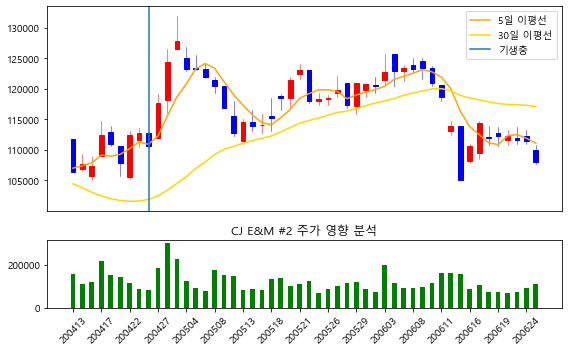

In [64]:
# 그림 비율
fig=plt.figure(figsize=(8,5))
# 그리드 2행 1열짜리 높이비율 3:1로 생성
gs=gridspec.GridSpec(2,1,height_ratios=[3,1])
axis=[]
# 축 선정
axis.append(plt.subplot(gs[0]))
# axis[0]을 그리드 공유
axis.append(plt.subplot(gs[1],sharex=axis[0]))
# 공유x축 표시 없애기
axis[0].get_xaxis().set_visible(False)
# 캔들 스틱용 데이터 만들기
x=np.arange(len(cdata))
xa= np.reshape(x, (-1,1))
ohlc=np.hstack((xa, cdata))
# 캔들스틱 그리기
candlestick_ohlc(axis[0], ohlc, width=0.5, colorup='r', colordown='b')
# 거래량 그래프
axis[1].bar(x, voldata, color='g', width=0.5)
plt.title('CJ E&M #2 주가 영향 분석')
plt.xticks(xtic, xdays, rotation=45)
axis[0].plot(gmv5, color='orange', label="5일 이평선")
axis[0].plot(gmv30, color='gold', label="30일 이평선")
axis[0].axvline(x=8, label='기생충')
axis[0].legend()
plt.tight_layout()
plt.show()

In [63]:
# plt.savefig('cchart_cjenm.jpg')

<Figure size 432x288 with 0 Axes>